# Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:

from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene,shapiro

# ANOVA

In [1]:
a = np.array([25, 25, 27, 30, 23, 20])
b = np.array([30, 30, 21, 24, 26, 28])
c = np.array([18, 30, 29, 29, 24, 26])

In [2]:
print("a : ", a)
print("b : ", b)
print("c : ", c)


a :  [25 25 27 30 23 20]
b :  [30 30 21 24 26 28]
c :  [18 30 29 29 24 26]


In [4]:
print("Avg(a) :",np.mean(a))
print("Avg(b) :",np.mean(b))
print("Avg(c) :",np.mean(c))

Avg(a) : 25.0
Avg(b) : 26.5
Avg(c) : 26.0


In [5]:
(6*((25-25.83)**2))+(6*((26.5-25.83)**2))+(6*((26-25.83)**2))

7.0002

In [9]:
np.sum((a-a.mean())**2)+np.sum((b-b.mean())**2)+np.sum((c-c.mean())**2)

223.5

In [10]:
np.sum((a-a.mean())**2)

58.0

In [14]:
p_value=1-f.cdf(0.2348,dfn=2,dfd=15)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
    print("Interpretation : Reject Ho")
    print("Conclusion : Gender Affects the buying pattern")
else:
    print("Interpretation : Fail to Reject Ho")

p_value :  0.7935810912142631
Interpretation : Fail to Reject Ho


In [17]:
f_stat,p_value=f_oneway(a,b,c)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
    print("Interpretation : Reject Ho")
    print("Conclusion : Gender Affects the buying pattern")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  0.2348993288590604
p_value :  0.793504662732833
Interpretation : Fail to Reject Ho


# Aerofit -->  Anova

In [20]:
df=pd.read_csv("aerofit.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [21]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<AxesSubplot:xlabel='Product', ylabel='Income'>

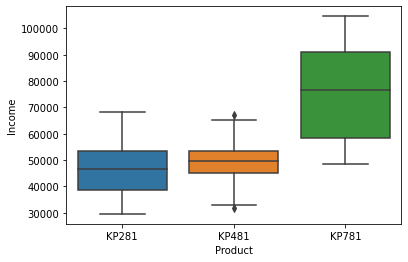

In [22]:
sns.boxplot(x="Product",y="Income",data=df)

In [31]:
df["random_group"]=np.random.choice(["g1","g2","g3"],size=len(df))
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g1
1,KP281,19,Male,15,Single,2,3,31836,75,g2
2,KP281,19,Female,14,Partnered,4,3,30699,66,g2
3,KP281,19,Male,12,Single,3,3,32973,85,g2
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,g3
176,KP781,42,Male,18,Single,5,4,89641,200,g2
177,KP781,45,Male,16,Single,5,5,90886,160,g3
178,KP781,47,Male,18,Partnered,4,5,104581,120,g1


<AxesSubplot:xlabel='random_group', ylabel='Income'>

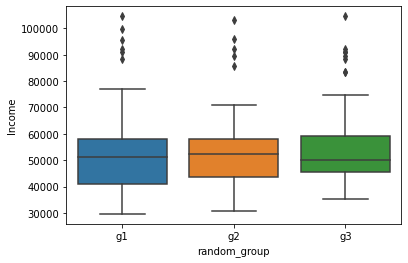

In [32]:
sns.boxplot(x="random_group",y="Income",data=df)

In [33]:
income_g1 = df[df["random_group"]=="g1"]["Income"]
income_g2 = df[df["random_group"]=="g2"]["Income"]
income_g3 = df[df["random_group"]=="g3"]["Income"]

In [34]:
# Ho : All have the same means 
# Ha : Atleast one of them is different
f_stat,p_value=f_oneway(income_g1,income_g2,income_g3)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
    print("Interpretation : Reject Ho")
    print("Conclusion : Gender Affects the buying pattern")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  0.505206271164861
p_value :  0.6042485016417896
Interpretation : Fail to Reject Ho


In [37]:
print("income_g1 Mean :",income_g1.mean())
print("income_g2 Mean :",income_g2.mean())
print("income_g3 Mean :",income_g3.mean())

income_g1 Mean : 53949.056603773584
income_g2 Mean : 52301.07142857143
income_g3 Mean : 55248.228070175435


In [35]:
income_281 = df[df["Product"]=="KP281"]["Income"]
income_481 = df[df["Product"]=="KP481"]["Income"]
income_781 = df[df["Product"]=="KP781"]["Income"]

In [36]:
print("income_281 Mean :",income_281.mean())
print("income_481 Mean :",income_481.mean())
print("income_781 Mean :",income_781.mean())

income_281 Mean : 46418.025
income_481 Mean : 48973.65
income_781 Mean : 75441.575


In [38]:
# Ho : All have the same means 
# Ha : Atleast one of them is different
f_stat,p_value=f_oneway(income_281,income_481,income_781)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
    print("Interpretation : Reject Ho")
    print("Conclusion : Atleast one of them is different")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  89.25903546601671
p_value :  1.5644991316342494e-27
Interpretation : Reject Ho
Conclusion : Atleast one of them is different


In [41]:
# Ho : All have the same means 
# Ha : Atleast one of them is different
f_stat,p_value=kruskal(income_281,income_481,income_781)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
    print("Interpretation : Reject Ho")
    print("Conclusion : Atleast one of them is different")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  61.43670384567185
p_value :  4.562357014275808e-14
Interpretation : Reject Ho
Conclusion : Atleast one of them is different


<AxesSubplot:xlabel='Income', ylabel='Density'>

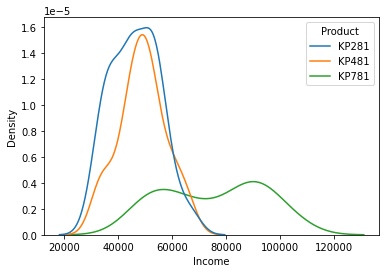

In [42]:
sns.kdeplot(x="Income",hue="Product",data=df)

<AxesSubplot:xlabel='Income', ylabel='Density'>

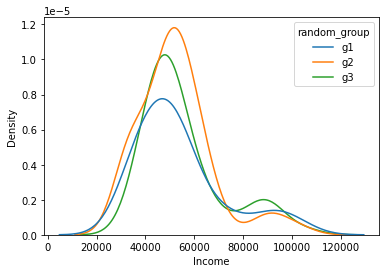

In [43]:
sns.kdeplot(x="Income",hue="random_group",data=df)

In [44]:
# Ho : All are similar
# Ha : Atleast one of them is different
f_stat,p_value=kruskal(income_g1,income_g2,income_g3)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
    print("Interpretation : Reject Ho")
    print("Conclusion : Atleast one of them is different")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  0.3110749103494736
p_value :  0.8559550163838108
Interpretation : Fail to Reject Ho


# Levene Test


In [45]:
df1=pd.read_csv("weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [46]:
height_men = df1[df1["Gender"]=="Male"]["Height"]
height_women = df1[df1["Gender"]=="Female"]["Height"]

<AxesSubplot:xlabel='Height', ylabel='Count'>

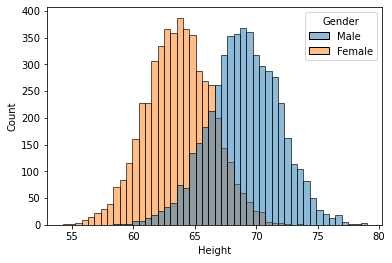

In [47]:
sns.histplot(data=df1, x="Height", hue="Gender")

In [49]:
height_men.mean()

69.02634590621737

In [48]:
height_women.mean()

63.708773603424916

In [52]:
ttest_ind(height_men,height_women)

Ttest_indResult(statistic=95.60271449148823, pvalue=0.0)

In [54]:
height_men.var()

8.19884325252049

In [53]:
height_women.var()

7.269947493670132

In [56]:
# Ho : Variances are Equal
# Ha : Variances are NOT Equal
x_stat,p_value=levene(height_men,height_women)
print("x_stat : ",x_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
    print("Interpretation : Reject Ho")
    print("Conclusion : Variances are NOT Equal")
else:
    print("Interpretation : Fail to Reject Ho")
    print("Conclusion : Variances are Equal")

x_stat :  12.284910854677701
p_value :  0.0004586349895436178
Interpretation : Reject Ho
Conclusion : Variances are NOT Equal


# Wilkin Shapiro Test

Take a few samples generally [50-200]


The test may not work if data points are <50 or Greater >200

In [57]:
height_sample=df1["Height"].sample(100)
height_sample

3736    71.415165
9496    62.527229
6374    60.870586
2445    66.446420
1954    76.116675
          ...    
7162    72.429771
3833    62.202789
2650    71.910912
3974    72.286541
9710    68.107087
Name: Height, Length: 100, dtype: float64

In [59]:
# Ho : Data is Gaussian
# Ha : Data is NOT Gaussian
shapiro(height_sample)

ShapiroResult(statistic=0.9774994254112244, pvalue=0.08472525328397751)

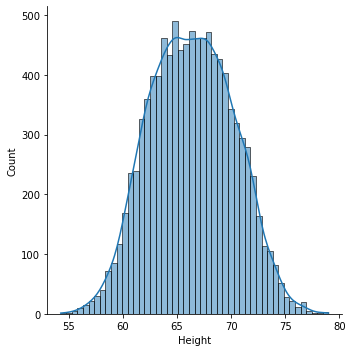

In [60]:
sns.displot(df1["Height"],kde=True)

<AxesSubplot:xlabel='Height', ylabel='Density'>

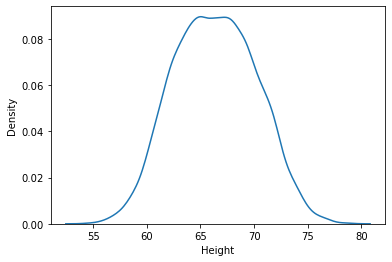

In [62]:
sns.kdeplot(df1["Height"])

# Doubts

In [67]:
a = np.array([80,75,82,85,90,82])
b = np.array([57,50,60,65,64,67])
c = np.array([69,71,72,73,66,77])

In [68]:
a.mean()

82.33333333333333

In [69]:
b.mean()

60.5

In [70]:
c.mean()

71.33333333333333

<AxesSubplot:ylabel='Density'>

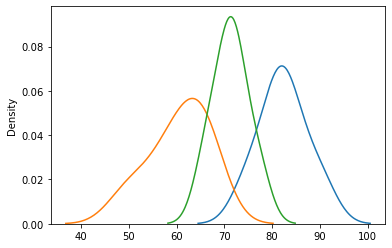

In [72]:
sns.kdeplot(a)
sns.kdeplot(b)
sns.kdeplot(c)

In [ ]:
a = np.array([80,75,82,85,90,82])
b = np.array([57,50,60,65,64,67])
c = np.array([69,71,72,73,66,77])

In [73]:
a1 = np.array([80,75,72,73,64,67])
b1 = np.array([57,50,82,85,66,77])
c1 = np.array([69,71,60,65,90,82])

In [75]:
print(a1.mean())
print(b1.mean())
print(c1.mean())

71.83333333333333
69.5
72.83333333333333


<AxesSubplot:ylabel='Density'>

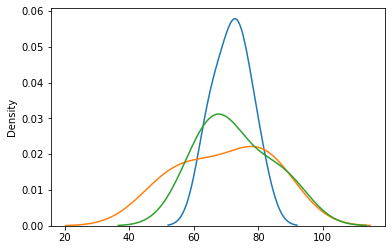

In [76]:
sns.kdeplot(a1)
sns.kdeplot(b1)
sns.kdeplot(c1)